In [1]:
# Imports
import os
import sys
import SimpleITK as sitk
import matplotlib.pyplot as plt
import nibabel as nib 
import numpy as np

nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

from modules import transforms

In [2]:
# Paths
USER = "leila" #change the user 
TRACER ="pbr28"
RAW_DATA_ROOT = "/autofs/space/simba_001/users/PBR28_KOALA/data/PET"
WORKING_PROCESSED_DATA_PATH = f"/autofs/space/celer_001/users/{USER}/working_{TRACER}"
WINDOWS_SHARED_DATA_PATH =  f"/autofs/space/celer_001/users/{USER}/{TRACER}"
PATIENTS_WITH_GT = f"{WORKING_PROCESSED_DATA_PATH}/pickles/unfiltered_patient_list.pkl"
FINAL_DATA_PATH_FOR_MODEL = f"/autofs/space/celer_001/users/{USER}/data/{TRACER}"

In [49]:
sample_t1_mask = f"{FINAL_DATA_PATH_FOR_MODEL}/PBRKOA_HC021_01/mr_nifti/gt_t1_head_mask.nii.gz"
sample_pet = f"{FINAL_DATA_PATH_FOR_MODEL}/PBRKOA_HC021_01/pet_nifti/OP-recon-180-s-low-count.nii"
sample_pet

'/autofs/space/celer_001/users/leila/data/pbr28/PBRKOA_HC021_01/pet_nifti/OP-recon-180-s-low-count.nii'

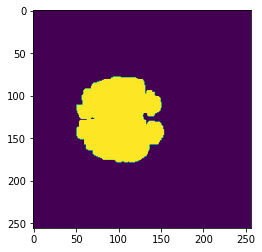

In [75]:
orginal_pet = np.squeeze(nib.load(sample_pet).get_fdata())
mr_mask =  np.squeeze(nib.load(sample_t1_mask).get_fdata())
def transform_low_count(file_path):
    img = nib.load(file_path).get_fdata()
    img = img.squeeze()
    img = np.rot90(img)
    img = np.flip(img, 2)
    img = np.flip(img, 0)
    return img 
img = transform_low_count(sample_pet)
plt.imshow(mr_mask[:,:,50])

# registered_mask = nib.load('../test.nii.gz').get_fdata()
# registered_mask.shape
# plt.imshow(np.rot90(np.squeeze(orginal_pet)[:, :, 127 - 43]))
# plt.imshow(registered_t1_mask[43, :, :], alpha = 0.3)
# np.unique(registered_mask)

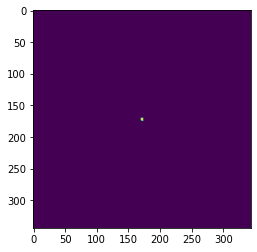

In [63]:
alpha = 0.0055
plt.imshow(registered_mask[:, :, 32] * orginal_pet[:,:, 32])

In [10]:
registered_t1_mask.shape

(127, 344, 344)

In [51]:
ls "/autofs/space/celer_001/users/leila/data/pbr28/PBRKOA_HC021_01/pet_nifti/"

gt_recon.nii.gz  OP-recon-180-s-low-count.nii  r_mask.nii
